In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('telecom_churn_data.csv',sep = ',')

In [3]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
df[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']]=df[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'
                  ,'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']].fillna(0, axis=1)

In [5]:
df['total_data_amt_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6 
df['total_data_amt_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7
df['total_data_amt_8'] = df.total_rech_data_8 * df.av_rech_amt_data_8

In [6]:
df['average'] = (df.total_rech_amt_6.fillna(0) + df.total_rech_amt_7.fillna(0)+df.total_data_amt_6.fillna(0)+df.total_data_amt_7.fillna(0))/4

In [7]:
df.average.mean()

242.6640337903379

In [8]:
average = df['average'].quantile(0.7)
average

239.0

In [9]:
df_new = df[df['average'] >= average]

In [10]:
df_new.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_amt_6,total_data_amt_7,total_data_amt_8,average
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,NaN,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,279.5
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,NaN,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,592.5
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,NaN,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,348.0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,NaN,720,0.00,0.00,0.00,0.00,0.0,0.0,0.0,320.0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,1.0,604,40.45,51.86,0.00,0.00,0.0,712.0,540.0,291.5


In [11]:
df_new.shape

(30001, 230)

In [12]:
#df['average'] = (df.total_rech_amt_6 + df.total_rech_amt_7)/2

In [12]:
#average = df['average'].quantile(0.7)
#average

368.5

In [13]:
#pd = df[df['average'] >= average]

In [13]:
df_new.shape

(30001, 230)

In [14]:
df_new['churn'] = np.where((df_new['total_ic_mou_9'] == 0) & (df_new['total_og_mou_9'] == 0) & (df_new['vol_2g_mb_9'] == 0) & (df_new['vol_3g_mb_9'] == 0),1,0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
#Rename Columns
df_new.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [16]:
df_new = df_new[df_new.columns.drop(list(df_new.filter(regex='_9')))]

In [17]:
df_new = df_new[df_new.columns.drop(list(df_new.filter(regex='last_date_of_month')))]

In [18]:
df_new.shape

(30001, 173)

In [19]:
df_new['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [20]:
df_new['day_of_last_rech_6'] = df_new['date_of_last_rech_6'].str.split("/",expand = True)[1].astype(float)
df_new['day_of_last_rech_7'] = df_new['date_of_last_rech_7'].str.split("/",expand = True)[1].astype(float)
df_new['day_of_last_rech_8'] = df_new['date_of_last_rech_8'].str.split("/",expand = True)[1].astype(float)
df_new['day_of_last_rech_data_6'] = df_new['date_of_last_rech_data_6'].str.split("/",expand = True)[1].astype(float)
df_new['day_of_last_rech_data_7'] = df_new['date_of_last_rech_data_7'].str.split("/",expand = True)[1].astype(float)
df_new['day_of_last_rech_data_8'] = df_new['date_of_last_rech_data_8'].str.split("/",expand = True)[1].astype(float)

In [21]:
df_new.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7'
        ,'date_of_last_rech_data_8'],axis =1 , inplace = True)

In [22]:
df_new = df_new.loc[:, df_new.var() != 0.0]

In [23]:
pd.set_option("display.max_rows",250)

In [24]:
#Get the null % of all the columns
print('\n Null % \n',round(100*(df_new.isnull().sum()/len(df_new.index)), 2))


 Null % 
 mobile_number               0.00
arpu_6                      0.00
arpu_7                      0.00
arpu_8                      0.00
onnet_mou_6                 1.82
onnet_mou_7                 1.79
onnet_mou_8                 3.91
offnet_mou_6                1.82
offnet_mou_7                1.79
offnet_mou_8                3.91
roam_ic_mou_6               1.82
roam_ic_mou_7               1.79
roam_ic_mou_8               3.91
roam_og_mou_6               1.82
roam_og_mou_7               1.79
roam_og_mou_8               3.91
loc_og_t2t_mou_6            1.82
loc_og_t2t_mou_7            1.79
loc_og_t2t_mou_8            3.91
loc_og_t2m_mou_6            1.82
loc_og_t2m_mou_7            1.79
loc_og_t2m_mou_8            3.91
loc_og_t2f_mou_6            1.82
loc_og_t2f_mou_7            1.79
loc_og_t2f_mou_8            3.91
loc_og_t2c_mou_6            1.82
loc_og_t2c_mou_7            1.79
loc_og_t2c_mou_8            3.91
loc_og_mou_6                1.82
loc_og_mou_7                1.79

### none of the rows exist where all the date and call columns are having null values. So the null values are independent of data and calls and support our earlier assumption that the null values indicate no usage of service rather than having missing values and so can be imputed by zeros

In [25]:
df_new = df_new.fillna(0,axis = 1)

In [26]:
#Get the null % of all the columns
print('\n Null % \n',round(100*(df_new.isnull().sum()/len(df_new.index)), 2))


 Null % 
 mobile_number              0.0
arpu_6                     0.0
arpu_7                     0.0
arpu_8                     0.0
onnet_mou_6                0.0
onnet_mou_7                0.0
onnet_mou_8                0.0
offnet_mou_6               0.0
offnet_mou_7               0.0
offnet_mou_8               0.0
roam_ic_mou_6              0.0
roam_ic_mou_7              0.0
roam_ic_mou_8              0.0
roam_og_mou_6              0.0
roam_og_mou_7              0.0
roam_og_mou_8              0.0
loc_og_t2t_mou_6           0.0
loc_og_t2t_mou_7           0.0
loc_og_t2t_mou_8           0.0
loc_og_t2m_mou_6           0.0
loc_og_t2m_mou_7           0.0
loc_og_t2m_mou_8           0.0
loc_og_t2f_mou_6           0.0
loc_og_t2f_mou_7           0.0
loc_og_t2f_mou_8           0.0
loc_og_t2c_mou_6           0.0
loc_og_t2c_mou_7           0.0
loc_og_t2c_mou_8           0.0
loc_og_mou_6               0.0
loc_og_mou_7               0.0
loc_og_mou_8               0.0
std_og_t2t_mou_6           0

In [27]:
df_new.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,total_data_amt_7,total_data_amt_8,average,churn,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,day_of_last_rech_data_6,day_of_last_rech_data_7,day_of_last_rech_data_8
count,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,...,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,7.001206e+09,558.490824,560.782203,508.597957,260.793024,267.819295,234.112539,373.693961,378.103169,335.077044,...,528.233732,463.252944,576.310314,0.081364,26.398320,27.180527,26.168928,11.266158,11.974034,10.805006
std,6.908784e+05,460.640461,479.776947,501.961981,459.644368,479.993989,458.448598,482.523558,498.923555,482.062509,...,1476.036563,1622.766035,679.356991,0.273398,4.845796,4.837576,6.388573,11.795880,12.237130,11.945277
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,239.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000609e+09,309.865000,309.826000,231.473000,17.080000,16.030000,10.390000,71.610000,69.910000,46.740000,...,0.000000,0.000000,301.500000,0.000000,25.000000,26.000000,25.000000,0.000000,0.000000,0.000000
50%,7.001203e+09,481.694000,480.943000,427.585000,84.580000,82.810000,65.610000,222.540000,220.030000,182.790000,...,100.000000,25.000000,400.000000,0.000000,28.000000,29.000000,28.000000,7.000000,9.000000,5.000000
75%,7.001804e+09,699.943000,698.315000,661.491000,290.440000,290.240000,239.960000,487.940000,494.010000,438.890000,...,575.000000,304.000000,604.000000,0.000000,30.000000,31.000000,30.000000,24.000000,25.000000,23.000000
max,7.002411e+09,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,9667.130000,14007.340000,...,55080.000000,89106.500000,30618.000000,1.000000,30.000000,31.000000,31.000000,30.000000,31.000000,31.000000


In [28]:
ls = list(df_new.filter(regex='day_of'))
cols = df_new.columns.drop(ls)
cols = cols.drop(['aon','churn','average','mobile_number'])

In [29]:
#Create a new dataframe
total_data = pd.DataFrame()

In [30]:
#Create an empty list
sublist=[]

#Get the columns names removing last two characters
for col in cols:
    sublist.append(col[:-2])

In [31]:
#Import ordered dict package
from collections import OrderedDict

#Get unique column names after removing last two characters into a list
collist=[]
collist=list(OrderedDict.fromkeys(sublist))
collist

['arpu',
 'onnet_mou',
 'offnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'loc_og_t2m_mou',
 'loc_og_t2f_mou',
 'loc_og_t2c_mou',
 'loc_og_mou',
 'std_og_t2t_mou',
 'std_og_t2m_mou',
 'std_og_t2f_mou',
 'std_og_mou',
 'isd_og_mou',
 'spl_og_mou',
 'og_others',
 'total_og_mou',
 'loc_ic_t2t_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2f_mou',
 'loc_ic_mou',
 'std_ic_t2t_mou',
 'std_ic_t2m_mou',
 'std_ic_t2f_mou',
 'std_ic_mou',
 'total_ic_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'total_rech_num',
 'total_rech_amt',
 'max_rech_amt',
 'last_day_rch_amt',
 'total_rech_data',
 'max_rech_data',
 'count_rech_2g',
 'count_rech_3g',
 'av_rech_amt_data',
 'vol_2g_mb',
 'vol_3g_mb',
 'arpu_3g',
 'arpu_2g',
 'night_pck_user',
 'monthly_2g',
 'sachet_2g',
 'monthly_3g',
 'sachet_3g',
 'fb_user',
 'vbc_3g',
 'total_data_amt']

In [32]:
#Loop through all the unique features, append 6,7,8 and add the totals to the new dataframe
for col in collist:
    total_data['total_'+col] = df_new[col+'_6']+df_new[col+'_7']+df_new[col+'_8']

In [33]:
#Add back churn and aon columns to new dataframe
total_data['aon'] = df_new['aon']
total_data['churn'] = df_new['churn']

In [34]:
#Get first few rows of new dataframe
total_data.head()

,total_arpu,total_onnet_mou,total_offnet_mou,total_roam_ic_mou,total_roam_og_mou,total_loc_og_t2t_mou,total_loc_og_t2m_mou,total_loc_og_t2f_mou,total_loc_og_t2c_mou,total_loc_og_mou,...,total_night_pck_user,total_monthly_2g,total_sachet_2g,total_monthly_3g,total_sachet_3g,total_fb_user,total_vbc_3g,total_total_data_amt,aon,churn
0,626.004,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0,0,3,0,3.0,131.60,756.0,968,1
7,5590.510,164.81,1346.50,81.36,74.39,123.05,918.29,170.50,0.00,1211.86,...,0.0,0,0,0,0,0.0,95.86,0.0,802,1
8,1008.306,799.80,311.77,0.00,0.00,527.21,202.08,0.00,7.15,729.31,...,0.0,1,4,0,0,2.0,1053.84,561.0,315,0
21,1749.966,319.66,2638.00,0.00,0.00,33.98,284.55,2.33,0.00,320.87,...,0.0,0,0,0,0,0.0,0.00,0.0,720,0
23,635.213,133.20,380.66,0.00,0.00,133.20,314.51,0.00,17.71,447.73,...,0.0,0,0,3,1,2.0,92.31,1252.0,604,0


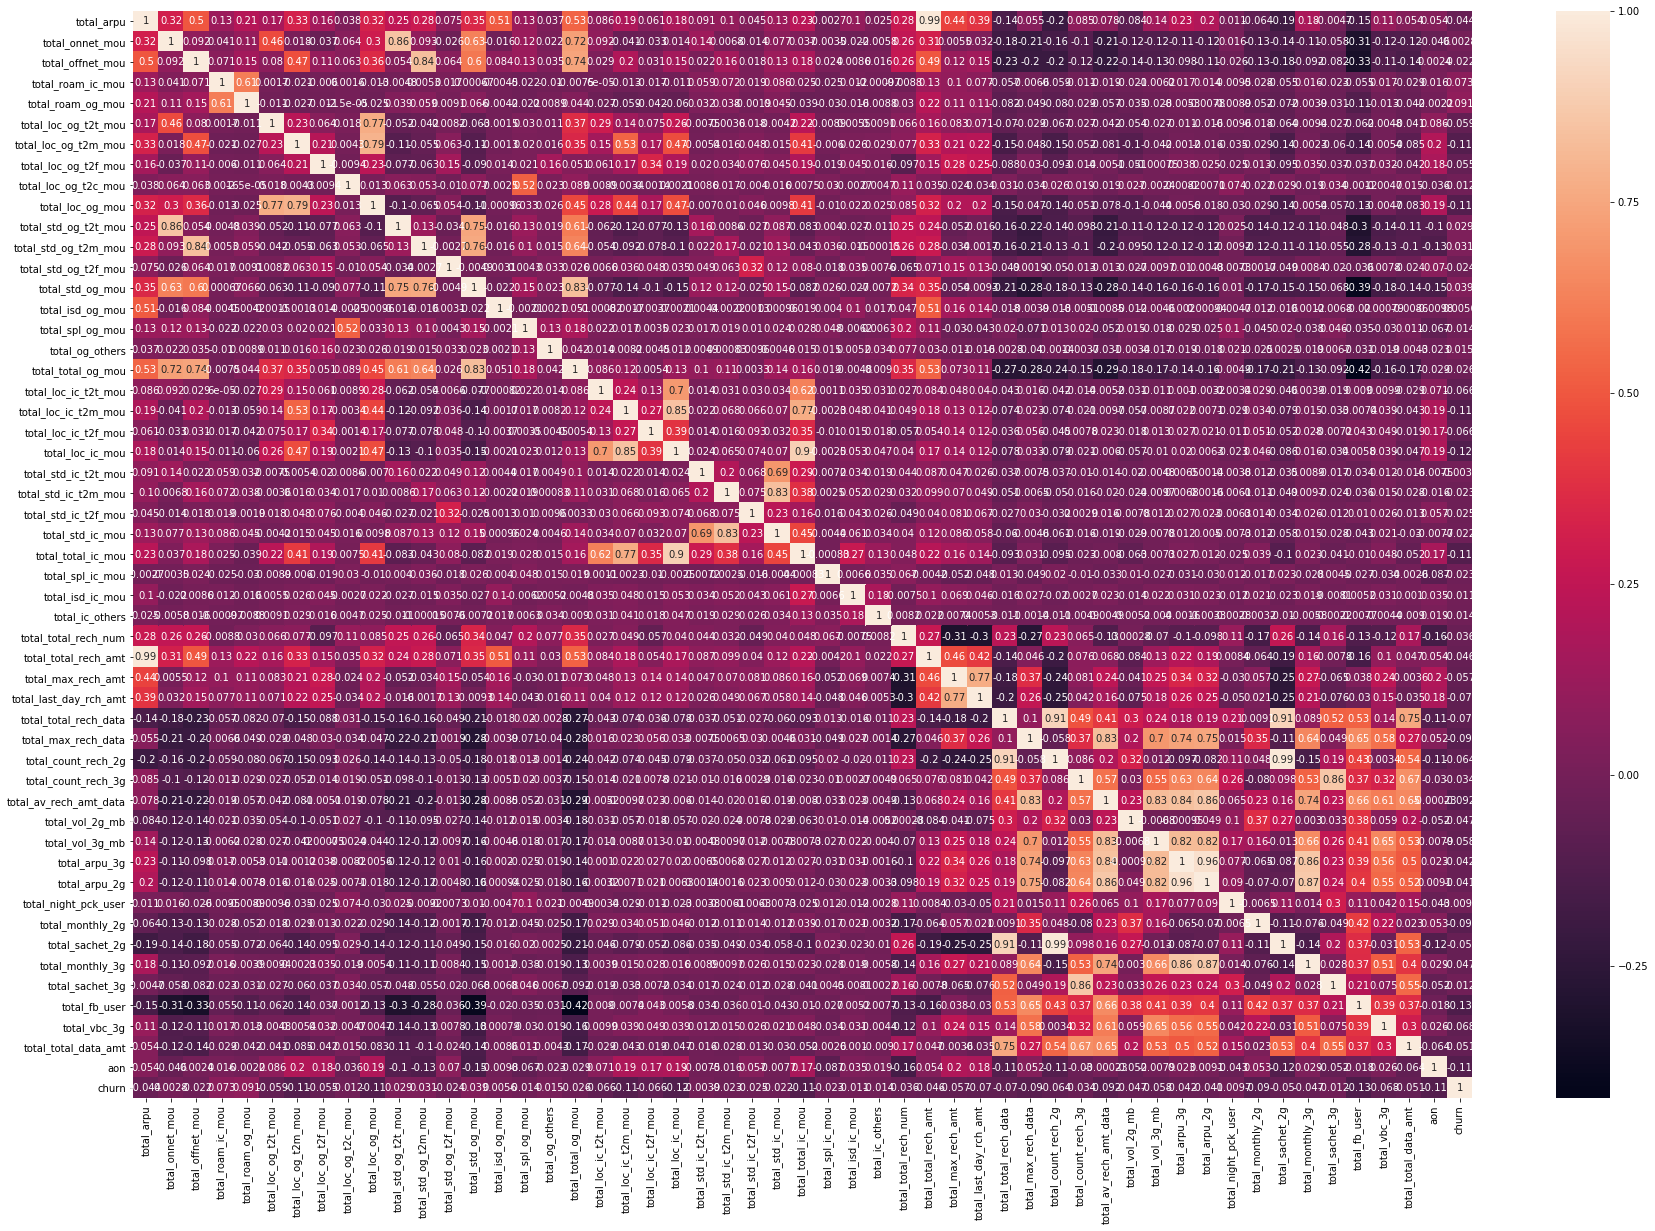

In [35]:
#Lets plot the correlation matrix of new dataframe

#%matplotlib inline
%matplotlib inline
# Let's see the correlation matrix 
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(total_data.corr(),annot = True)

This is the correlation of summation dataframe so it represents the same correlation characteristics of our original dataframe features
<br>
total_arpu and total_rech_amt are highly correlated. The arpu is highly dependendent on the total amount recharged by the customers for calls than data
<br>
Onnet_mou is highly depended on std_og_t2t (same network) and offnet_mou is dependednt on std_og_t2m(Other network)
<br>
total loc_og_mou is dependent on loc_og_t2t and loc_og_t2m
<br>
Also total og_mou and onnet mou is highly dependent on std_og_mou
<br>
Total loc_mou is highly dependent on loc_t2t_mou and total_std_mou is dependent on std_t2m_mou. So customers are getting local incoming calls mostly from the same network but getting std incoming calls from other networks
<br>
Total_rech_amt is correlated with last_day_rech_amt. So mostly customers are recharging only once
<br>
arpu_2g and arpu_3g are highly correlated. 2g_rech_amt is correlated with 2g_sachets and 3g_rech_mt is correlated with monthly. So customers are preferring to do 3g recharges monthly data packs while 2g they are preferring to do it in sachets. Mostly data columns are highly correlated with each other

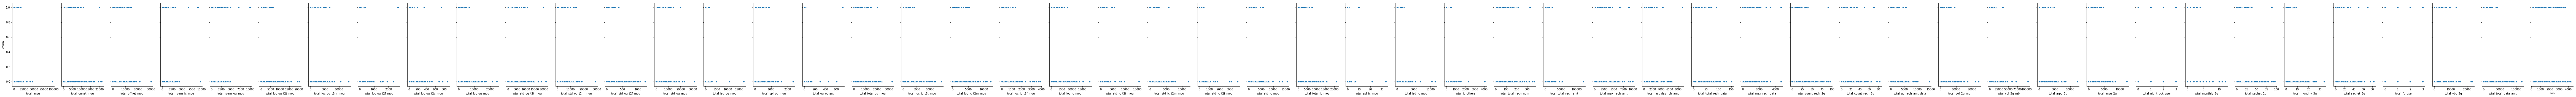

In [36]:
#Pair plot of all the columns with respect to churn
sns.pairplot(total_data, x_vars=total_data.drop('churn', axis=1).columns, y_vars='churn', size=5, aspect=0.5,kind='scatter')

#### There are outliers present in some of the columns, lets observe them and remove the outliers 

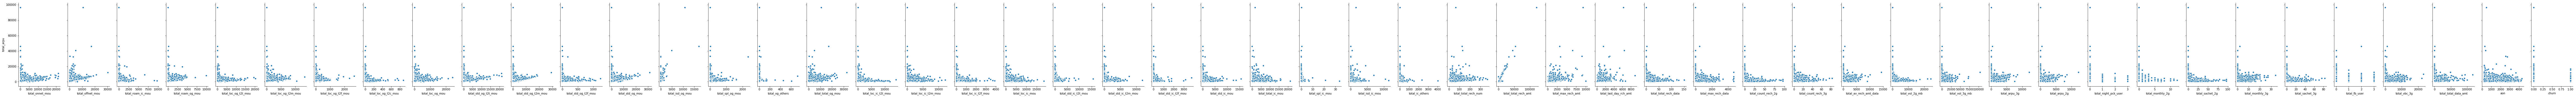

In [37]:
sns.pairplot(total_data, x_vars=total_data.drop('total_arpu', axis=1).columns, y_vars='total_arpu', size=5, aspect=0.5,kind='scatter')

In [38]:
#Since these are few datapoints lets remove the outliers in both total and high_value_cust dataframes
df_new = df_new.drop(total_data[total_data['total_arpu']>40000].index)
total_data = total_data.drop(total_data[total_data['total_arpu']>40000].index)


df_new = df_new.drop(total_data[total_data['total_offnet_mou']>30000].index)
total_data = total_data.drop(total_data[total_data['total_offnet_mou']>30000].index)

df_new = df_new.drop(total_data[total_data['total_roam_ic_mou']>9500].index)
total_data = total_data.drop(total_data[total_data['total_roam_ic_mou']>9500].index)

df_new = df_new.drop(total_data[total_data['total_roam_og_mou']>7500].index)
total_data = total_data.drop(total_data[total_data['total_roam_og_mou']>7500].index)

df_new = df_new.drop(total_data[total_data['total_loc_og_t2f_mou']>2000].index)
total_data = total_data.drop(total_data[total_data['total_loc_og_t2f_mou']>2000].index)

df_new = df_new.drop(total_data[total_data['total_loc_ic_t2t_mou']>12000].index)
total_data = total_data.drop(total_data[total_data['total_loc_ic_t2t_mou']>12000].index)

df_new = df_new.drop(total_data[total_data['total_std_ic_t2m_mou']>10000].index)
total_data = total_data.drop(total_data[total_data['total_std_ic_t2m_mou']>10000].index)

df_new = df_new.drop(total_data[total_data['total_isd_ic_mou']>7500].index)
total_data = total_data.drop(total_data[total_data['total_isd_ic_mou']>7500].index)

df_new = df_new.drop(total_data[total_data['total_arpu_2g']>10000].index)
total_data = total_data.drop(total_data[total_data['total_arpu_2g']>10000].index)

df_new = df_new.drop(total_data[total_data['total_total_rech_amt']==0].index)
total_data = total_data.drop(total_data[total_data['total_total_rech_amt']==0].index)

In [39]:
#Get the info of the high_value_customers dataframe after dropping outliers
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29987 entries, 0 to 99997
Columns: 163 entries, mobile_number to day_of_last_rech_data_8
dtypes: float64(136), int32(1), int64(26)
memory usage: 37.4 MB


In [40]:
#Get the info of the total_data dataframe after dropping outliers
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29987 entries, 0 to 99997
Data columns (total 53 columns):
total_arpu                29987 non-null float64
total_onnet_mou           29987 non-null float64
total_offnet_mou          29987 non-null float64
total_roam_ic_mou         29987 non-null float64
total_roam_og_mou         29987 non-null float64
total_loc_og_t2t_mou      29987 non-null float64
total_loc_og_t2m_mou      29987 non-null float64
total_loc_og_t2f_mou      29987 non-null float64
total_loc_og_t2c_mou      29987 non-null float64
total_loc_og_mou          29987 non-null float64
total_std_og_t2t_mou      29987 non-null float64
total_std_og_t2m_mou      29987 non-null float64
total_std_og_t2f_mou      29987 non-null float64
total_std_og_mou          29987 non-null float64
total_isd_og_mou          29987 non-null float64
total_spl_og_mou          29987 non-null float64
total_og_others           29987 non-null float64
total_total_og_mou        29987 non-null float64
total_loc

In [41]:
#Create new dataframe
goodvsaction_df = pd.DataFrame()

In [42]:
#For all the columns input one if average of good months is greater than action month value else 0
for col in collist:
    goodvsaction_df['good_action_'+col] = df_new[[col+'_6',col+'_7',col+'_8']].apply(lambda x: 1 if (((x[col+'_6']+x[col+'_7'])/2) >= (x[col+'_8'])) else -1, axis=1)

In [43]:
#Convert the features to category
goodvsaction_df = goodvsaction_df.apply(lambda x: x.astype('category'))

In [44]:
#Get first few rows of new dataframe
goodvsaction_df.head()

,good_action_arpu,good_action_onnet_mou,good_action_offnet_mou,good_action_roam_ic_mou,good_action_roam_og_mou,good_action_loc_og_t2t_mou,good_action_loc_og_t2m_mou,good_action_loc_og_t2f_mou,good_action_loc_og_t2c_mou,good_action_loc_og_mou,...,good_action_arpu_3g,good_action_arpu_2g,good_action_night_pck_user,good_action_monthly_2g,good_action_sachet_2g,good_action_monthly_3g,good_action_sachet_3g,good_action_fb_user,good_action_vbc_3g,good_action_total_data_amt
0,-1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7,-1,1,1,-1,-1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,-1,1
8,1,1,-1,1,1,1,1,1,-1,1,...,-1,1,1,1,-1,1,1,-1,1,-1
21,-1,1,-1,1,1,-1,-1,-1,1,-1,...,1,1,1,1,1,1,1,1,1,1
23,-1,1,-1,1,1,1,-1,1,-1,-1,...,-1,1,1,1,1,1,-1,-1,-1,-1


In [45]:
#Create new feature as difference of incoming and outgoing usages. Since we have 0 values we cannot use ratio
total_data['in_out_difference']=total_data['total_total_ic_mou']-total_data['total_total_og_mou']

In [46]:
#Create new feature as difference of onnet and offnet usages. Since we have 0 values we cannot use ratio
total_data['onnet_offnet_difference'] = total_data['total_onnet_mou']-total_data['total_offnet_mou']

In [47]:
#Get ratio of data arpu to amount arpu
total_data['arpu_data_to_total_ratio'] = (total_data['total_arpu_2g']+total_data['total_arpu_3g'])/total_data['total_arpu']

In [48]:
#Get the ratio of average data recharge to amount recharge
total_data['data_to_amt_ratio']=total_data['total_av_rech_amt_data']/total_data['total_total_rech_amt']

In [49]:
#Drop aon and churn columns from total_data
total_data=total_data.drop(['aon','churn'], axis=1)

In [50]:
#Get info of total_data dataframe
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29987 entries, 0 to 99997
Data columns (total 55 columns):
total_arpu                  29987 non-null float64
total_onnet_mou             29987 non-null float64
total_offnet_mou            29987 non-null float64
total_roam_ic_mou           29987 non-null float64
total_roam_og_mou           29987 non-null float64
total_loc_og_t2t_mou        29987 non-null float64
total_loc_og_t2m_mou        29987 non-null float64
total_loc_og_t2f_mou        29987 non-null float64
total_loc_og_t2c_mou        29987 non-null float64
total_loc_og_mou            29987 non-null float64
total_std_og_t2t_mou        29987 non-null float64
total_std_og_t2m_mou        29987 non-null float64
total_std_og_t2f_mou        29987 non-null float64
total_std_og_mou            29987 non-null float64
total_isd_og_mou            29987 non-null float64
total_spl_og_mou            29987 non-null float64
total_og_others             29987 non-null float64
total_total_og_mou      

In [51]:
#Get info of goodvsaction_df dataframe
goodvsaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29987 entries, 0 to 99997
Data columns (total 51 columns):
good_action_arpu                29987 non-null category
good_action_onnet_mou           29987 non-null category
good_action_offnet_mou          29987 non-null category
good_action_roam_ic_mou         29987 non-null category
good_action_roam_og_mou         29987 non-null category
good_action_loc_og_t2t_mou      29987 non-null category
good_action_loc_og_t2m_mou      29987 non-null category
good_action_loc_og_t2f_mou      29987 non-null category
good_action_loc_og_t2c_mou      29987 non-null category
good_action_loc_og_mou          29987 non-null category
good_action_std_og_t2t_mou      29987 non-null category
good_action_std_og_t2m_mou      29987 non-null category
good_action_std_og_t2f_mou      29987 non-null category
good_action_std_og_mou          29987 non-null category
good_action_isd_og_mou          29987 non-null category
good_action_spl_og_mou          29987 non-null cate

In [52]:
#Get high_value_cust dataframe
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29987 entries, 0 to 99997
Columns: 163 entries, mobile_number to day_of_last_rech_data_8
dtypes: float64(136), int32(1), int64(26)
memory usage: 37.4 MB


In [53]:
#Merge the dataframes
final_data = pd.concat([total_data, goodvsaction_df], axis=1)

In [54]:
final_data = pd.concat([df_new[ls], final_data], axis=1)

In [55]:
#Get the info of master dataframe
final_data.columns.tolist()

['day_of_last_rech_6',
 'day_of_last_rech_7',
 'day_of_last_rech_8',
 'day_of_last_rech_data_6',
 'day_of_last_rech_data_7',
 'day_of_last_rech_data_8',
 'total_arpu',
 'total_onnet_mou',
 'total_offnet_mou',
 'total_roam_ic_mou',
 'total_roam_og_mou',
 'total_loc_og_t2t_mou',
 'total_loc_og_t2m_mou',
 'total_loc_og_t2f_mou',
 'total_loc_og_t2c_mou',
 'total_loc_og_mou',
 'total_std_og_t2t_mou',
 'total_std_og_t2m_mou',
 'total_std_og_t2f_mou',
 'total_std_og_mou',
 'total_isd_og_mou',
 'total_spl_og_mou',
 'total_og_others',
 'total_total_og_mou',
 'total_loc_ic_t2t_mou',
 'total_loc_ic_t2m_mou',
 'total_loc_ic_t2f_mou',
 'total_loc_ic_mou',
 'total_std_ic_t2t_mou',
 'total_std_ic_t2m_mou',
 'total_std_ic_t2f_mou',
 'total_std_ic_mou',
 'total_total_ic_mou',
 'total_spl_ic_mou',
 'total_isd_ic_mou',
 'total_ic_others',
 'total_total_rech_num',
 'total_total_rech_amt',
 'total_max_rech_amt',
 'total_last_day_rch_amt',
 'total_total_rech_data',
 'total_max_rech_data',
 'total_count_rech

In [56]:
final_data[['aon','churn']] = df_new[['aon','churn']]

In [57]:
#Get first few rows of dataframe
final_data.head(5)

,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,day_of_last_rech_data_6,day_of_last_rech_data_7,day_of_last_rech_data_8,total_arpu,total_onnet_mou,total_offnet_mou,total_roam_ic_mou,...,good_action_night_pck_user,good_action_monthly_2g,good_action_sachet_2g,good_action_monthly_3g,good_action_sachet_3g,good_action_fb_user,good_action_vbc_3g,good_action_total_data_amt,aon,churn
0,21.0,16.0,8.0,21.0,16.0,8.0,626.004,0.00,0.00,0.00,...,1,1,1,1,1,1,1,1,968,1
7,27.0,25.0,26.0,0.0,0.0,0.0,5590.510,164.81,1346.50,81.36,...,1,1,1,1,1,1,-1,1,802,1
8,25.0,31.0,30.0,0.0,31.0,23.0,1008.306,799.80,311.77,0.00,...,1,1,-1,1,1,-1,1,-1,315,0
21,30.0,31.0,31.0,0.0,0.0,0.0,1749.966,319.66,2638.00,0.00,...,1,1,1,1,1,1,1,1,720,0
23,18.0,7.0,24.0,0.0,7.0,6.0,635.213,133.20,380.66,0.00,...,1,1,1,1,-1,-1,-1,-1,604,0


In [58]:
#Get the info of final dataframe
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29987 entries, 0 to 99997
Columns: 114 entries, day_of_last_rech_6 to churn
dtypes: category(51), float64(53), int32(1), int64(9)
memory usage: 16.0 MB


In [59]:
#Check if any nulls exist in final dataframe
round(100*(final_data.isnull().sum()/len(final_data.index)), 2).sum()

0.0

In [60]:
#Get all string columns
str_cols = final_data.select_dtypes(include=['category']).columns.tolist()

In [61]:
str_cols

['good_action_arpu',
 'good_action_onnet_mou',
 'good_action_offnet_mou',
 'good_action_roam_ic_mou',
 'good_action_roam_og_mou',
 'good_action_loc_og_t2t_mou',
 'good_action_loc_og_t2m_mou',
 'good_action_loc_og_t2f_mou',
 'good_action_loc_og_t2c_mou',
 'good_action_loc_og_mou',
 'good_action_std_og_t2t_mou',
 'good_action_std_og_t2m_mou',
 'good_action_std_og_t2f_mou',
 'good_action_std_og_mou',
 'good_action_isd_og_mou',
 'good_action_spl_og_mou',
 'good_action_og_others',
 'good_action_total_og_mou',
 'good_action_loc_ic_t2t_mou',
 'good_action_loc_ic_t2m_mou',
 'good_action_loc_ic_t2f_mou',
 'good_action_loc_ic_mou',
 'good_action_std_ic_t2t_mou',
 'good_action_std_ic_t2m_mou',
 'good_action_std_ic_t2f_mou',
 'good_action_std_ic_mou',
 'good_action_total_ic_mou',
 'good_action_spl_ic_mou',
 'good_action_isd_ic_mou',
 'good_action_ic_others',
 'good_action_total_rech_num',
 'good_action_total_rech_amt',
 'good_action_max_rech_amt',
 'good_action_last_day_rch_amt',
 'good_action_tot

In [62]:
# Add data to pca data for transforming string variables
pca_data = final_data

In [63]:
str_data=pca_data[str_cols]

In [64]:
#Convert the category variables as a fraction of churn/ non churn on those variables
for col in str_cols:
    frac_val1 = sum(pca_data[pca_data[col]==-1].churn)/float(len(pca_data[pca_data[col]==-1].churn)-sum(pca_data[pca_data[col]==-1].churn))
    frac_val2 = sum(pca_data[pca_data[col]==1].churn)/float(len(pca_data[pca_data[col]==1].churn)-sum(pca_data[pca_data[col]==1].churn))            
    str_data[col] = pca_data.applymap(lambda x: frac_val1 if x==-1 else frac_val2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [65]:
str_data.head(20)

,good_action_arpu,good_action_onnet_mou,good_action_offnet_mou,good_action_roam_ic_mou,good_action_roam_og_mou,good_action_loc_og_t2t_mou,good_action_loc_og_t2m_mou,good_action_loc_og_t2f_mou,good_action_loc_og_t2c_mou,good_action_loc_og_mou,...,good_action_arpu_3g,good_action_arpu_2g,good_action_night_pck_user,good_action_monthly_2g,good_action_sachet_2g,good_action_monthly_3g,good_action_sachet_3g,good_action_fb_user,good_action_vbc_3g,good_action_total_data_amt
0,0.137127,0.135261,0.138549,0.072471,0.07358,0.136642,0.140996,0.115545,0.099495,0.140346,...,0.105761,0.108121,0.08907,0.094178,0.101764,0.095234,0.093233,0.095653,0.105665,0.111737
7,0.137127,0.135261,0.138549,0.072471,0.07358,0.136642,0.140996,0.115545,0.099495,0.140346,...,0.105761,0.108121,0.08907,0.094178,0.101764,0.095234,0.093233,0.095653,0.105665,0.111737
8,0.137127,0.135261,0.138549,0.072471,0.07358,0.136642,0.140996,0.115545,0.099495,0.140346,...,0.105761,0.108121,0.08907,0.094178,0.101764,0.095234,0.093233,0.095653,0.105665,0.111737
21,0.137127,0.135261,0.138549,0.072471,0.07358,0.136642,0.140996,0.115545,0.099495,0.140346,...,0.105761,0.108121,0.08907,0.094178,0.101764,0.095234,0.093233,0.095653,0.105665,0.111737
23,0.137127,0.135261,0.138549,0.072471,0.07358,0.136642,0.140996,0.115545,0.099495,0.140346,...,0.105761,0.108121,0.08907,0.094178,0.101764,0.095234,0.093233,0.095653,0.105665,0.111737
33,0.137127,0.135261,0.138549,0.072471,0.07358,0.136642,0.140996,0.115545,0.099495,0.140346,...,0.105761,0.108121,0.08907,0.094178,0.101764,0.095234,0.093233,0.095653,0.105665,0.111737
38,0.137127,0.135261,0.138549,0.072471,0.07358,0.136642,0.140996,0.115545,0.099495,0.140346,...,0.105761,0.108121,0.08907,0.094178,0.101764,0.095234,0.093233,0.095653,0.105665,0.111737
41,0.137127,0.135261,0.138549,0.072471,0.07358,0.136642,0.140996,0.115545,0.099495,0.140346,...,0.105761,0.108121,0.08907,0.094178,0.101764,0.095234,0.093233,0.095653,0.105665,0.111737
48,0.137127,0.135261,0.138549,0.072471,0.07358,0.136642,0.140996,0.115545,0.099495,0.140346,...,0.105761,0.108121,0.08907,0.094178,0.101764,0.095234,0.093233,0.095653,0.105665,0.111737
53,0.137127,0.135261,0.138549,0.072471,0.07358,0.136642,0.140996,0.115545,0.099495,0.140346,...,0.105761,0.108121,0.08907,0.094178,0.101764,0.095234,0.093233,0.095653,0.105665,0.111737


In [66]:
#Add the transformed string columns back to pca dataset
pca_data[str_cols]=str_data[str_cols]

In [67]:
pca_data.head()

,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,day_of_last_rech_data_6,day_of_last_rech_data_7,day_of_last_rech_data_8,total_arpu,total_onnet_mou,total_offnet_mou,total_roam_ic_mou,...,good_action_night_pck_user,good_action_monthly_2g,good_action_sachet_2g,good_action_monthly_3g,good_action_sachet_3g,good_action_fb_user,good_action_vbc_3g,good_action_total_data_amt,aon,churn
0,21.0,16.0,8.0,21.0,16.0,8.0,626.004,0.00,0.00,0.00,...,0.08907,0.094178,0.101764,0.095234,0.093233,0.095653,0.105665,0.111737,968,1
7,27.0,25.0,26.0,0.0,0.0,0.0,5590.510,164.81,1346.50,81.36,...,0.08907,0.094178,0.101764,0.095234,0.093233,0.095653,0.105665,0.111737,802,1
8,25.0,31.0,30.0,0.0,31.0,23.0,1008.306,799.80,311.77,0.00,...,0.08907,0.094178,0.101764,0.095234,0.093233,0.095653,0.105665,0.111737,315,0
21,30.0,31.0,31.0,0.0,0.0,0.0,1749.966,319.66,2638.00,0.00,...,0.08907,0.094178,0.101764,0.095234,0.093233,0.095653,0.105665,0.111737,720,0
23,18.0,7.0,24.0,0.0,7.0,6.0,635.213,133.20,380.66,0.00,...,0.08907,0.094178,0.101764,0.095234,0.093233,0.095653,0.105665,0.111737,604,0


In [68]:
#Import scale package
from sklearn.preprocessing import scale
#Scale all the independent variables and get into new dataframe
X=pd.DataFrame(scale(pca_data.drop(['churn'],axis=1)))
#Get independent variable into new dataframe
y = pca_data['churn']
#Get independent columns and update dataframe
X.columns=pca_data.drop('churn',axis=1).columns

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:197: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [69]:
#Import test_train_split to get train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [70]:
#Get train and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=100)

In [71]:
# Importing metrics for evalutation from  from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,precision_score, recall_score, f1_score

In [72]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14693 entries, 10770 to 28859
Columns: 113 entries, day_of_last_rech_6 to aon
dtypes: float64(113)
memory usage: 12.8 MB


In [73]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=100)

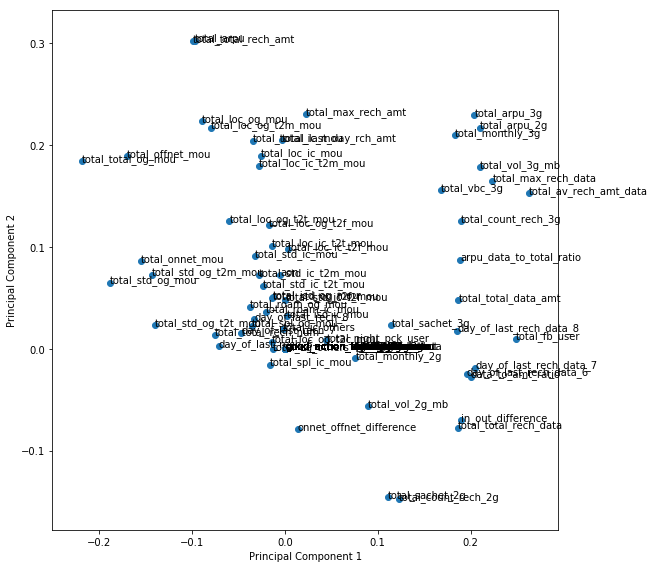

In [74]:
# Lets see the distibutions of columns in PCA in 2d space
pca.fit(X_train)
fig = plt.figure(figsize = (8,8))
plt.scatter(pca.components_[0],pca.components_[1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(X_train.columns):
    plt.annotate(txt, (pca.components_[0][i],pca.components_[1][i]))
plt.tight_layout()
plt.show()

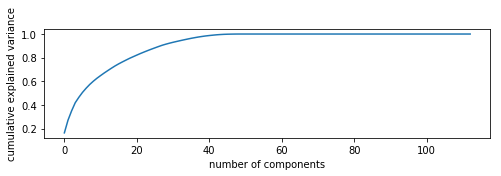

In [75]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (8,2))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

##### From the graph it is clear that around 30 components convey more than 95% of variance data

In [76]:
#Import incremental PCA
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=30)

In [77]:
#Fit the train data
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(14693, 30)

In [78]:
#Fit the validation data
df_val_pca = pca_final.fit_transform(X_val)
df_val_pca.shape

(6297, 30)

In [79]:
#Fit the validation data
df_test_pca = pca_final.fit_transform(X_test)
df_test_pca.shape

(8997, 30)

In [81]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameter and balanced subsample to tackle class imbalance.
rfc = RandomForestClassifier(class_weight='balanced_subsample')

In [82]:
# fit
rfc.fit(df_train_pca,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [80]:
# Let's check the report of our default model on training data
print(classification_report(y_train,rfc.predict(df_train_pca)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13491
           1       1.00      0.87      0.93      1202

   micro avg       0.99      0.99      0.99     14693
   macro avg       0.99      0.94      0.96     14693
weighted avg       0.99      0.99      0.99     14693



In [81]:
# Printing confusion matrix
print(confusion_matrix(y_train,rfc.predict(df_train_pca)))

[[13490     1]
 [  156  1046]]


In [82]:
# Let's check the report of our default model on validation data
print(classification_report(y_val,rfc.predict(df_val_pca)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5783
           1       0.33      0.00      0.01       514

   micro avg       0.92      0.92      0.92      6297
   macro avg       0.63      0.50      0.48      6297
weighted avg       0.87      0.92      0.88      6297



In [83]:
# Printing confusion matrix
print(confusion_matrix(y_val,rfc.predict(df_val_pca)))

[[5779    4]
 [ 512    2]]



F1 score for training data is almost 1 wheareas for validation data it is much less. It is clearly overfitting. We will use GridSearch on each parameter to check the optimal range. Since it is classification we use auc_score for our scoring metric

We will use greedy based algorithm to identify best hyperparameters using grid search

In [84]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 4
scoring = {'AUC': 'roc_auc'}
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced_subsample')


# fit tree on training data
grid_search = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring='roc_auc',verbose=1)
grid_search.fit(df_train_pca, y_train)
train_results = grid_search.cv_results_

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarn

In [85]:
#Add the results to dataframe
pd.DataFrame(train_results).head(10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.201632,0.036860,0.016742,0.010347,2,{'max_depth': 2},0.797633,0.794757,0.803396,0.807704,0.800871,0.005023,3,0.834609,0.801407,0.818415,0.823219,0.819413,0.011944
1,0.434503,0.065207,0.008501,0.001117,7,{'max_depth': 7},0.829034,0.837210,0.841608,0.829925,0.834445,0.005212,1,0.935019,0.935609,0.936396,0.936464,0.935872,0.000596
2,0.482729,0.018983,0.009250,0.000430,12,{'max_depth': 12},0.813998,0.817351,0.810014,0.827417,0.817194,0.006447,2,0.986860,0.986138,0.986067,0.987142,0.986552,0.000461
3,0.588407,0.082436,0.013243,0.007357,17,{'max_depth': 17},0.771061,0.823770,0.805390,0.798636,0.799714,0.018930,4,0.995004,0.996298,0.995324,0.995845,0.995618,0.000494


In [86]:
#Fit the range of feature on validation data to plot
auc_list = []
feature_list=[]
for feature in range(2, 20, 5):
    rf = RandomForestClassifier(max_depth=feature,class_weight='balanced_subsample')
    rf.fit(df_train_pca,y_train)
    fpr, tpr, thresholds = roc_curve(y_val, rf.predict(df_val_pca))
    auc_list.append(auc(fpr, tpr))
    feature_list.append(feature)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


Text(0,0.5,'AUC Score')

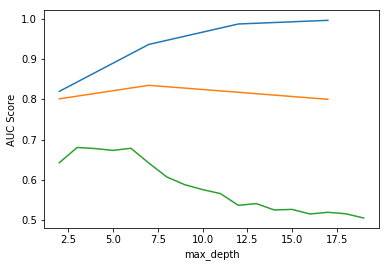

In [87]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(train_results["param_max_depth"], 
         train_results["mean_train_score"], 
         label="train auc score")
plt.plot(train_results["param_max_depth"], 
         train_results["mean_test_score"], 
         label="test auc score")
plt.plot(feature_list, 
         auc_list, 
         label="valid auc score")
plt.xlabel("max_depth")
plt.ylabel("AUC Score")

In [88]:
#Fit the range of features
parameters = {'n_estimators': range(200, 1000, 200)}

# instantiate the model ()
rf = RandomForestClassifier(class_weight='balanced_subsample', max_depth=6)

# fit tree on training data
grid_search = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring='roc_auc',n_jobs=-1,verbose=10)
grid_search.fit(df_train_pca, y_train)
train_results = grid_search.cv_results_

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:  1.8min remaining:   50.4s
[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:  2.6min remaining:   36.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  2.6min finished


In [89]:
pd.DataFrame(train_results).head(20)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,15.338213,0.080777,0.235367,0.014001,200,{'n_estimators': 200},0.847552,0.852864,0.857706,0.854779,0.853225,0.003702,4,0.929658,0.928606,0.929562,0.929229,0.929264,0.000412
1,31.106682,0.196567,0.554434,0.115694,400,{'n_estimators': 400},0.845984,0.854608,0.858333,0.856254,0.853794,0.004699,2,0.929804,0.929394,0.929570,0.929902,0.929667,0.000199
2,35.373237,0.279255,0.460238,0.034947,600,{'n_estimators': 600},0.846330,0.853084,0.860611,0.855701,0.853931,0.005154,1,0.930016,0.929147,0.929789,0.930005,0.929739,0.000354
3,43.741569,0.092083,0.615899,0.015917,800,{'n_estimators': 800},0.846674,0.853681,0.858588,0.856045,0.853746,0.004437,3,0.930747,0.929315,0.929705,0.929748,0.929879,0.000529


In [90]:
#Fit the range of feature on validation data to plot
auc_list = []
feature_list=[]
for feature in range(200, 1000, 200):
    rf = RandomForestClassifier(n_estimators=feature, class_weight='balanced_subsample', max_depth=6)
    rf.fit(df_train_pca,y_train)
    fpr, tpr, thresholds = roc_curve(y_val, rf.predict(df_val_pca))
    auc_list.append(auc(fpr, tpr))
    feature_list.append(feature)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


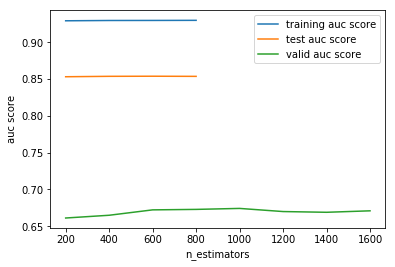

In [91]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(train_results["param_n_estimators"], 
         train_results["mean_train_score"], 
         label="training auc score")
plt.plot(train_results["param_n_estimators"], 
         train_results["mean_test_score"], 
         label="test auc score")
plt.plot(feature_list, 
         auc_list, 
         label="valid auc score")
plt.xlabel("n_estimators")
plt.ylabel("auc score")
plt.legend()
plt.show()

In [85]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 4
scoring = {'AUC': 'roc_auc'}
# parameters to build the model on max_features
parameters = {'max_features': range(2, 30, 2)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced_subsample')


# fit tree on training data
grid_search = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring='roc_auc',n_jobs=-1, verbose=10)
grid_search.fit(df_train_pca, y_train)
train_results = grid_search.cv_results_

Fitting 4 folds for each of 14 candidates, totalling 56 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:  1.0min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [86]:
pd.DataFrame(train_results).head(20)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.833273,0.167631,0.024736,0.003030,2,{'max_features': 2},0.748411,0.780888,0.779619,0.766291,0.768802,0.013089,14,0.999810,0.999876,0.999812,0.999710,0.999802,0.000060
1,0.888241,0.060616,0.018240,0.007391,4,{'max_features': 4},0.761566,0.780864,0.786494,0.765138,0.773516,0.010433,12,0.999842,0.999775,0.999774,0.999787,0.999794,0.000028
2,1.388454,0.071084,0.018739,0.008809,6,{'max_features': 6},0.774358,0.791131,0.776228,0.772378,0.778525,0.007405,8,0.999688,0.999821,0.999886,0.999867,0.999815,0.000077
3,1.799719,0.118098,0.015241,0.000432,8,{'max_features': 8},0.772540,0.795020,0.793726,0.781188,0.785619,0.009285,3,0.999708,0.999651,0.999725,0.999714,0.999700,0.000029
4,2.301931,0.062512,0.022488,0.008377,10,{'max_features': 10},0.775930,0.781763,0.801205,0.767875,0.781694,0.012296,4,0.999613,0.999821,0.999723,0.999801,0.999740,0.000082
5,2.059070,0.160970,0.013493,0.000500,12,{'max_features': 12},0.775170,0.779051,0.776086,0.784054,0.778590,0.003465,7,0.999839,0.999476,0.999699,0.999638,0.999663,0.000130
6,2.387631,0.072294,0.019239,0.005162,14,{'max_features': 14},0.776237,0.764969,0.781544,0.782578,0.776331,0.006988,11,0.999541,0.999773,0.999566,0.999802,0.999670,0.000118
7,2.817885,0.072554,0.013742,0.000828,16,{'max_features': 16},0.793416,0.784222,0.804720,0.770010,0.788093,0.012715,1,0.999741,0.999797,0.999817,0.999797,0.999788,0.000028
8,2.972795,0.008257,0.015992,0.000707,18,{'max_features': 18},0.788954,0.746015,0.799998,0.773336,0.777075,0.020282,9,0.999758,0.999675,0.999690,0.999647,0.999693,0.000041
9,3.775586,0.069804,0.016491,0.003773,20,{'max_features': 20},0.778093,0.783313,0.790098,0.768945,0.780113,0.007725,5,0.999787,0.999737,0.999712,0.999764,0.999750,0.000028


In [87]:
#Fit the range of feature on validation data to plot
auc_list = []
feature_list=[]
for feature in range(2, 30, 2):
    rf = RandomForestClassifier(max_features=feature,class_weight='balanced_subsample')
    rf.fit(df_train_pca,y_train)
    fpr, tpr, thresholds = roc_curve(y_val, rf.predict(df_val_pca))
    auc_list.append(auc(fpr, tpr))
    feature_list.append(feature)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


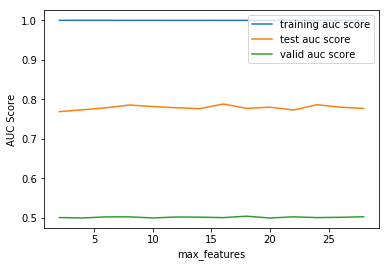

In [88]:
# plotting accuracies with param_max_features
plt.figure()
plt.plot(train_results["param_max_features"], 
         train_results["mean_train_score"], 
         label="training auc score")
plt.plot(train_results["param_max_features"], 
         train_results["mean_test_score"], 
         label="test auc score")
plt.plot(feature_list, 
         auc_list, 
         label="valid auc score")
plt.xlabel("max_features")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [89]:
# parameters to build the model on min_samples_leaf
parameters = {'min_samples_leaf': range(10, 400, 10)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced_subsample')


grid_search = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring='roc_auc',n_jobs=-1)
grid_search.fit(df_train_pca, y_train)
train_results = grid_search.cv_results_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [90]:
pd.DataFrame(train_results).head(15)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.821778,0.042902,0.016990,0.005241,10,{'min_samples_leaf': 10},0.831866,0.825715,0.840346,0.833539,0.832866,0.005209,26,0.979809,0.980897,0.981199,0.981826,0.980933,0.000730
1,0.843515,0.058758,0.013243,0.000433,20,{'min_samples_leaf': 20},0.832130,0.844867,0.847905,0.834773,0.839919,0.006622,6,0.958356,0.961075,0.960169,0.963088,0.960672,0.001704
2,0.706343,0.017703,0.012993,0.000707,30,{'min_samples_leaf': 30},0.821792,0.829970,0.850914,0.839269,0.835485,0.010843,21,0.947545,0.944687,0.950262,0.948209,0.947676,0.001995
3,0.702596,0.024194,0.012743,0.000829,40,{'min_samples_leaf': 40},0.825799,0.845553,0.848108,0.849994,0.842362,0.009693,2,0.936369,0.940562,0.934666,0.940570,0.938042,0.002595
4,0.643380,0.009089,0.020989,0.012260,50,{'min_samples_leaf': 50},0.844480,0.847085,0.850085,0.846191,0.846960,0.002032,1,0.930839,0.927575,0.928804,0.931774,0.929748,0.001651
5,0.614645,0.014293,0.011743,0.000433,60,{'min_samples_leaf': 60},0.834673,0.837316,0.846870,0.841218,0.840019,0.004590,5,0.923523,0.919347,0.924265,0.921110,0.922061,0.001953
6,0.637133,0.012353,0.012493,0.001117,70,{'min_samples_leaf': 70},0.835316,0.834075,0.840763,0.841853,0.838001,0.003358,11,0.914827,0.915363,0.914450,0.915433,0.915019,0.000403
7,0.604904,0.019907,0.013492,0.002597,80,{'min_samples_leaf': 80},0.832744,0.843775,0.840926,0.838781,0.839056,0.004052,9,0.910970,0.909333,0.908748,0.909095,0.909536,0.000853
8,0.605152,0.021347,0.013243,0.002164,90,{'min_samples_leaf': 90},0.835213,0.834713,0.845925,0.842487,0.839584,0.004782,8,0.905848,0.903354,0.904855,0.908126,0.905546,0.001734
9,0.607401,0.018662,0.012742,0.000829,100,{'min_samples_leaf': 100},0.841507,0.844355,0.842237,0.840126,0.842056,0.001528,4,0.902117,0.904614,0.893048,0.896513,0.899073,0.004550


In [91]:
#Fit the range of feature on validation data to plot
auc_list = []
feature_list=[]
for feature in range(10, 400, 10):
    rf = RandomForestClassifier(min_samples_leaf=feature, class_weight='balanced_subsample')
    rf.fit(df_train_pca,y_train)
    fpr, tpr, thresholds = roc_curve(y_val, rf.predict(df_val_pca))
    auc_list.append(auc(fpr, tpr))
    feature_list.append(feature)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


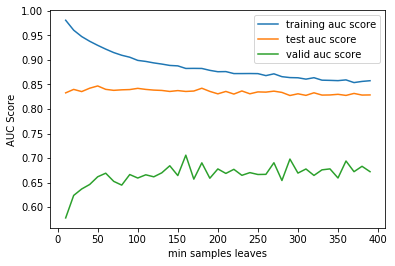

In [92]:
# plotting accuracies with param_min_samples_leaf
plt.figure()
plt.plot(train_results["param_min_samples_leaf"], 
         train_results["mean_train_score"], 
         label="training auc score")
plt.plot(train_results["param_min_samples_leaf"], 
         train_results["mean_test_score"], 
         label="test auc score")
plt.plot(feature_list, 
         auc_list, 
         label="valid auc score")
plt.xlabel("min samples leaves")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [93]:
# parameters to build the model on min_samples_split
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced_subsample')


# fit tree on training data
grid_search = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring='roc_auc',n_jobs=-1)
grid_search.fit(df_train_pca, y_train)
train_results = grid_search.cv_results_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [94]:
pd.DataFrame(train_results).head(10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.720586,0.011590,0.012994,0.001413,200,{'min_samples_split': 200},0.827960,0.841514,0.842311,0.844069,0.838962,0.006420,4,0.927305,0.922851,0.926322,0.922475,0.924738,0.002108
1,0.761312,0.058548,0.039478,0.016998,250,{'min_samples_split': 250},0.832440,0.835552,0.848864,0.840900,0.839438,0.006226,3,0.923334,0.917036,0.917857,0.912613,0.917710,0.003811
2,0.866502,0.035029,0.013243,0.001089,300,{'min_samples_split': 300},0.825836,0.839521,0.843874,0.853984,0.840802,0.010110,2,0.914837,0.911298,0.908106,0.909391,0.910908,0.002537
3,0.822525,0.018184,0.015743,0.001919,350,{'min_samples_split': 350},0.841685,0.846912,0.837475,0.844265,0.842584,0.003481,1,0.909501,0.901498,0.901754,0.907514,0.905067,0.003513
4,0.682109,0.037358,0.014493,0.001803,400,{'min_samples_split': 400},0.827618,0.840012,0.842011,0.839298,0.837234,0.005641,6,0.899520,0.899412,0.896527,0.896607,0.898016,0.001450
5,0.703844,0.006255,0.011995,0.000707,450,{'min_samples_split': 450},0.833487,0.831595,0.842648,0.845447,0.838293,0.005876,5,0.891399,0.892503,0.894552,0.890094,0.892137,0.001635


In [95]:
#Fit the range of feature on validation data to plot
auc_list = []
feature_list=[]
for feature in range(200, 500, 50):
    rf = RandomForestClassifier(min_samples_split=feature,class_weight='balanced_subsample')
    rf.fit(df_train_pca,y_train)
    fpr, tpr, thresholds = roc_curve(y_val, rf.predict(df_val_pca))
    auc_list.append(auc(fpr, tpr))
    feature_list.append(feature)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


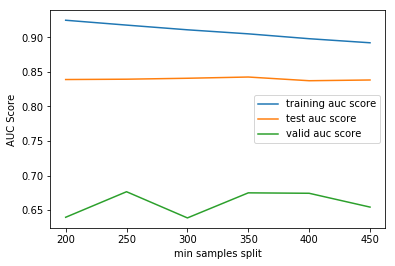

In [96]:
# plotting accuracies with param_min_samples_split
plt.figure()
plt.plot(train_results["param_min_samples_split"], 
         train_results["mean_train_score"], 
         label="training auc score")
plt.plot(train_results["param_min_samples_split"], 
         train_results["mean_test_score"], 
         label="test auc score")
plt.plot(feature_list, 
         auc_list, 
         label="valid auc score")
plt.xlabel("min samples split")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [97]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=7,
                             min_samples_leaf=100, 
                             min_samples_split=370,
                             max_features=28,
                             n_estimators=600,
                             class_weight='balanced_subsample')

In [98]:
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=7, max_features=28,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=100,
            min_samples_split=370, min_weight_fraction_leaf=0.0,
            n_estimators=600, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [99]:
# Let's check the report of our optimal model on training data
print(classification_report(y_train,rfc.predict(df_train_pca)))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90     13491
           1       0.30      0.79      0.44      1202

   micro avg       0.83      0.83      0.83     14693
   macro avg       0.64      0.81      0.67     14693
weighted avg       0.92      0.83      0.86     14693



In [100]:
# Printing confusion matrix
print(confusion_matrix(y_train,rfc.predict(df_train_pca)))

[[11279  2212]
 [  252   950]]


In [101]:
# Let's check the report of our optimal model on validation data
print(classification_report(y_val,rfc.predict(df_val_pca)))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      5783
           1       0.21      0.51      0.29       514

   micro avg       0.80      0.80      0.80      6297
   macro avg       0.58      0.67      0.59      6297
weighted avg       0.89      0.80      0.84      6297



In [102]:
# Printing confusion matrix
print(confusion_matrix(y_val,rfc.predict(df_val_pca)))

[[4794  989]
 [ 254  260]]


In [103]:
# Let's check the report of our default model on validation data
print(classification_report(y_test,rfc.predict(df_test_pca)))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      8274
           1       0.17      0.44      0.25       723

   micro avg       0.79      0.79      0.79      8997
   macro avg       0.56      0.63      0.56      8997
weighted avg       0.88      0.79      0.83      8997



In [104]:
# Printing confusion matrix
print(confusion_matrix(y_test,rfc.predict(df_test_pca)))

[[6767 1507]
 [ 404  319]]


## Results through PCA
### We get around 0.85 F1 score on the test data which is reasonable and 0.88 of preciscion and 0.82 of recall

We will use Lasso to understand what could be major predictors so that we dont drop them straight away. We will use a mild regulator 0.01 and get the features through lasso. But first let eliminate non important features and highly correlated features through RPA For optimal parameter lets use RFE to eliminate features to do lasso regression to identify strong predictors

In [105]:
#Scale all the independent variables and get into new dataframe
X=pd.DataFrame(scale(final_data.drop(['churn'],axis=1)))
#Get independent variable into new dataframe
y = final_data['churn']
#Get independent columns and update dataframe
X.columns=final_data.drop('churn',axis=1).columns

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:197: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [107]:
#Import test_train_split to get train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [108]:
#Get train and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=100)

In [109]:
#Import LogisticRegression module
from sklearn.linear_model import LogisticRegression

In [110]:
auc_list_train = []
auc_list_valid = []
feature_list=[]
from sklearn.feature_selection import RFE
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
X_train_reduce = X_train
X_val_reduce = X_val
for features in range(110,10,-10):
    lm = LogisticRegression(class_weight='balanced')
    rfe = RFE(lm, features)                   # running RFE
    rfe = rfe.fit(X_train, y_train)
    X_train_reduce = X_train.drop(X_train.columns[~rfe.support_].tolist(),1)
    lm.fit(X_train_reduce,y_train)
    fpr, tpr, thresholds = roc_curve(y_train, lm.predict(X_train_reduce))
    
    X_val_reduce=X_val.drop(X_val.columns[~rfe.support_].tolist(),1)
    fpr_val, tpr_val, thresholds_val = roc_curve(y_val, lm.predict(X_val_reduce))
    #print(fpr)
    #print(tpr)
    print(str(features),'-',str(auc(fpr, tpr)),'-',str(auc(fpr_val, tpr_val)))
    feature_list.append(features)
    auc_list_train.append(auc(fpr, tpr))
    auc_list_valid.append(auc(fpr_val, tpr_val))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

110 - 0.7881214887696747 - 0.7857002040732565


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

100 - 0.7881214887696747 - 0.7857002040732565


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

90 - 0.7881214887696747 - 0.7857002040732565


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

80 - 0.7881214887696747 - 0.7857002040732565


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

70 - 0.7881214887696747 - 0.7857002040732565


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

60 - 0.7881214887696747 - 0.7857002040732565


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

50 - 0.7870959391057648 - 0.7855272834438254


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

40 - 0.7861157453708894 - 0.7863054262762653


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

30 - 0.7858275455961211 - 0.779971787696529


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

20 - 0.7809890453868858 - 0.7767513932894685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0,0.5,'AUC Score')

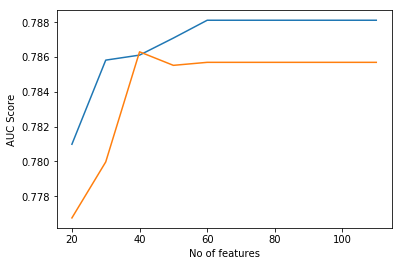

In [111]:
plt.figure()
plt.plot(feature_list, 
         auc_list_train, 
         label="train auc score")
plt.plot(feature_list,
         auc_list_valid, 
         label="test auc score")
plt.xlabel("No of features")
plt.ylabel("AUC Score")

40 seems to be the optimal number of features, lets consider the features through RFE

In [113]:
# Importing statsmodels
import statsmodels.api as sm  
# Add constant 
lm = LogisticRegression(class_weight='balanced')
rfe = RFE(lm, 40)                   # running RFE
rfe = rfe.fit(X_train, y_train)
X_train_model = X_train.drop(X_train.columns[~rfe.support_].tolist(),1)
X_train_model = sm.add_constant(X_train_model)  
#Fit a binomial model
lm_stats = sm.GLM(list(y_train),X_train_model, family=sm.families.Binomial()).fit()
lm_stats.summary()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                14693
Model:                            GLM   Df Residuals:                    14652
Model Family:                Binomial   Df Model:                           40
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3002.6
Date:                Mon, 13 May 2019   Deviance:                       6005.1
Time:                        23:23:45   Pearson chi2:                 1.84e+04
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -3.4656      0.061    -56.426      0.000      -3.586      -3.345
day_of_last_rech_7          -0.1547      0.032     -4.779      0.000      -0.218      -0.091
day_of_last_rech_8          -0.5398      0.028    -19.067      0.000      -0.595      -0.484
day_of_last_rech_data_6      0.2252      0.054      4.166      0.000       0.119       0.331
day_of_last_rech_data_7      0.0681      0.059      1.145      0.252      -0.048       0.185
day_of_last_rech_data_8     -0.7967      0.076    -10.471      0.000      -0.946      -0.648
total_arpu                   0.3975      0.200      1.985      0.047       0.005       0.790
total_onnet_mou             -2.8609      2.391     -1.197      0.231      -7.547       1.825
total_roam_ic_mou            0.1372      0.036      3.850      0.000       0.067       0.207
total_roam_og_mou            0.3363      0.241      1.393      0.164      -0.137       0.810
total_loc_og_t2t_mou      1.652e+04   2051.777      8.052      0.000    1.25e+04    2.05e+04
total_loc_og_t2m_mou      1.711e+04   2124.967      8.052      0.000    1.29e+04    2.13e+04
total_loc_og_t2f_mou      1398.9684    173.755      8.051      0.000    1058.415    1739.522
total_loc_og_mou         -2.664e+04   3307.978     -8.052      0.000   -3.31e+04   -2.02e+04
total_std_og_t2t_mou      5521.8684   4251.995      1.299      0.194   -2811.889    1.39e+04
total_std_og_t2m_mou      5530.2143   4258.622      1.299      0.194   -2816.531    1.39e+04
total_std_og_t2f_mou       161.1292    124.173      1.298      0.194     -82.246     404.504
total_std_og_mou         -8305.5320   6397.130     -1.298      0.194   -2.08e+04    4232.613
total_isd_og_mou             0.1004      0.059      1.711      0.087      -0.015       0.215
total_og_others              0.1047      0.053      1.969      0.049       0.000       0.209
total_loc_ic_t2m_mou        -0.1689      0.127     -1.331      0.183      -0.418       0.080
total_loc_ic_t2f_mou        -0.2009      0.095     -2.108      0.035      -0.388      -0.014
total_loc_ic_mou            -0.0550      0.127     -0.434      0.664      -0.303       0.193
total_spl_ic_mou            -0.2435      0.060     -4.065      0.000      -0.361      -0.126
total_total_rech_num        -0.1801      0.054     -3.311      0.001      -0.287      -0.073
total_total_rech_amt        -0.2694      0.205     -1.316      0.188      -0.671       0.132
total_max_rech_amt          -0.0775      0.067     -1.149      0.251      -0.210       0.055
total_last_day_rch_amt      -0.5119      0.068     -7.518      0.000      -0.645      -0.378
total_av_rech_amt_data      -0.1206      0.169     -0.713      0.476      -0.452       0.211
total_arpu_3g                0.2210      0.122      1.809      0.071      -0.019       0.461
total_arpu_2g                0.5322      0.174      3.061      0.002       0.191       0.873


In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
p_values = pd.DataFrame()
p_values["features"]=lm_stats.pvalues.index
p_values["p_value"]=lm_stats.pvalues.values
p_values = p_values.sort_values('p_value', ascending = False)
vif["VIF Factor"] = [variance_inflation_factor(X_train_model.values, i) for i in range(X_train_model.shape[1])]
vif["features"] = X_train_model.columns
result = pd.merge(vif,p_values,on='features')
result.sort_values(['VIF Factor','p_value']).head(80)

,VIF Factor,features,p_value
0,1.002287e+00,const,0.000000e+00
23,1.040837e+00,total_spl_ic_mou,4.812635e-05
19,1.053740e+00,total_og_others,4.894710e-02
40,1.191416e+00,aon,1.972575e-11
2,1.361453e+00,day_of_last_rech_8,4.737650e-81
1,1.405118e+00,day_of_last_rech_7,1.758697e-06
21,1.443508e+00,total_loc_ic_t2f_mou,3.507166e-02
39,1.717321e+00,arpu_data_to_total_ratio,1.316403e-06
8,1.745879e+00,total_roam_ic_mou,1.181146e-04
36,1.794362e+00,total_vbc_3g,4.750417e-02


In [117]:
def getStatisticsAfterDrop(feature):
    global X_train_model
    X_train_model=X_train_model.drop(feature,axis=1)
    #Fit a binomial model
    lm_stats = sm.GLM(list(y_train),X_train_model, family=sm.families.Binomial()).fit()
    vif = pd.DataFrame()
    p_values = pd.DataFrame()
    p_values["features"]=lm_stats.pvalues.index
    p_values["p_value"]=lm_stats.pvalues.values
    p_values = p_values.sort_values('p_value', ascending = False)
    vif["VIF Factor"] = [variance_inflation_factor(X_train_model.values, i) for i in range(X_train_model.shape[1])]
    vif["features"] = X_train_model.columns
    result = pd.merge(vif,p_values,on='features')
    return result.sort_values(['VIF Factor','p_value'], ascending=False).head(80)

Lets eliminate the highly correlated features

In [124]:
getStatisticsAfterDrop('total_monthly_3g')

,VIF Factor,features,p_value
12,7.592894e+09,total_loc_og_mou,4.276207e-17
10,3.142833e+09,total_loc_og_t2m_mou,4.283429e-17
9,2.927382e+09,total_loc_og_t2t_mou,4.278588e-17
11,2.008620e+07,total_loc_og_t2f_mou,4.316788e-17
35,1.506865e+02,onnet_offnet_difference,6.852400e-01
14,6.548447e+01,total_std_og_t2m_mou,5.148358e-01
13,6.442109e+01,total_std_og_t2t_mou,8.375930e-01
6,3.022175e+01,total_arpu,5.326557e-02
23,2.912343e+01,total_total_rech_amt,2.173986e-01
28,1.703387e+01,total_arpu_2g,7.051295e-03


In [125]:
getStatisticsAfterDrop('total_loc_og_mou')

,VIF Factor,features,p_value
34,150.686402,onnet_offnet_difference,6.692287e-01
13,65.483288,total_std_og_t2m_mou,4.983087e-01
12,64.420412,total_std_og_t2t_mou,8.152834e-01
6,30.171782,total_arpu,6.171321e-02
22,29.105866,total_total_rech_amt,2.102195e-01
10,26.297484,total_loc_og_t2m_mou,2.257475e-03
9,23.974293,total_loc_og_t2t_mou,3.140230e-01
27,17.033671,total_arpu_2g,1.507729e-02
25,13.905858,total_av_rech_amt_data,7.960055e-01
26,13.092025,total_arpu_3g,8.601910e-02


In [121]:
getStatisticsAfterDrop('total_std_og_mou')

,VIF Factor,features,p_value
13,7.594853e+09,total_loc_og_mou,7.203983e-17
11,3.143617e+09,total_loc_og_t2m_mou,7.189944e-17
10,2.928107e+09,total_loc_og_t2t_mou,7.180153e-17
12,2.009121e+07,total_loc_og_t2f_mou,7.244484e-17
7,3.671810e+03,total_onnet_mou,2.059199e-01
37,1.512919e+03,onnet_offnet_difference,2.412350e-01
14,9.099519e+02,total_std_og_t2t_mou,2.003366e-01
15,6.300512e+02,total_std_og_t2m_mou,2.616633e-01
9,3.632101e+01,total_roam_og_mou,1.446427e-01
6,3.028639e+01,total_arpu,4.916549e-02


In [122]:
getStatisticsAfterDrop('total_onnet_mou')

,VIF Factor,features,p_value
12,7.592900e+09,total_loc_og_mou,5.721831e-17
10,3.142834e+09,total_loc_og_t2m_mou,5.731400e-17
9,2.927383e+09,total_loc_og_t2t_mou,5.725059e-17
11,2.008620e+07,total_loc_og_t2f_mou,5.775448e-17
36,1.506872e+02,onnet_offnet_difference,6.970926e-01
14,6.548465e+01,total_std_og_t2m_mou,5.244781e-01
13,6.442127e+01,total_std_og_t2t_mou,8.497351e-01
6,3.024456e+01,total_arpu,4.811312e-02
23,2.915431e+01,total_total_rech_amt,2.094951e-01
28,1.907400e+01,total_arpu_2g,2.771142e-03


In [126]:
getStatisticsAfterDrop('onnet_offnet_difference')

,VIF Factor,features,p_value
6,30.154597,total_arpu,5.997657e-02
22,29.100628,total_total_rech_amt,2.107821e-01
27,17.032885,total_arpu_2g,1.494542e-02
25,13.901685,total_av_rech_amt_data,7.909187e-01
26,13.092015,total_arpu_3g,8.751699e-02
33,6.164078,total_total_data_amt,6.400990e-03
31,5.192162,total_fb_user,4.480863e-06
19,4.944553,total_loc_ic_mou,3.108893e-01
29,4.780406,total_sachet_2g,2.771611e-02
17,4.651460,total_loc_ic_t2m_mou,2.576818e-01


In [127]:
getStatisticsAfterDrop('total_arpu')

,VIF Factor,features,p_value
26,17.032708,total_arpu_2g,1.758887e-02
24,13.900943,total_av_rech_amt_data,8.511778e-01
25,12.945487,total_arpu_3g,6.808897e-02
32,6.163356,total_total_data_amt,5.536681e-03
30,5.189022,total_fb_user,5.845420e-06
18,4.943406,total_loc_ic_mou,2.963264e-01
28,4.780095,total_sachet_2g,2.897986e-02
16,4.649659,total_loc_ic_t2m_mou,2.702643e-01
21,4.019326,total_total_rech_amt,2.098590e-01
22,3.152145,total_max_rech_amt,1.927767e-01


In [128]:
getStatisticsAfterDrop('total_arpu_2g')

,VIF Factor,features,p_value
24,11.598646,total_av_rech_amt_data,2.960926e-01
25,7.280932,total_arpu_3g,4.202433e-05
31,6.131979,total_total_data_amt,1.572415e-02
29,5.188986,total_fb_user,5.280798e-06
18,4.943384,total_loc_ic_mou,2.894500e-01
16,4.649402,total_loc_ic_t2m_mou,2.748028e-01
27,4.497108,total_sachet_2g,1.168864e-01
21,4.016965,total_total_rech_amt,2.256983e-01
22,3.144308,total_max_rech_amt,2.520203e-01
4,2.663418,day_of_last_rech_data_7,5.390286e-01


In [130]:
getStatisticsAfterDrop('total_loc_ic_mou')

,VIF Factor,features,p_value
23,4.698014,total_arpu_3g,2.727814e-07
27,4.691731,total_fb_user,8.168348e-06
29,4.452752,total_total_data_amt,1.856749e-02
25,4.391866,total_sachet_2g,1.703634e-01
20,3.990830,total_total_rech_amt,2.783731e-01
21,3.137227,total_max_rech_amt,3.025489e-01
4,2.636540,day_of_last_rech_data_7,4.533355e-01
22,2.531875,total_last_day_rch_amt,1.931706e-14
5,2.286281,day_of_last_rech_data_8,5.218009e-28
3,2.177572,day_of_last_rech_data_6,8.815606e-05


In [129]:
getStatisticsAfterDrop('total_av_rech_amt_data')

,VIF Factor,features,p_value
18,4.943105,total_loc_ic_mou,2.849690e-01
24,4.699127,total_arpu_3g,2.678538e-07
28,4.692120,total_fb_user,8.362357e-06
16,4.649359,total_loc_ic_t2m_mou,2.801181e-01
30,4.452757,total_total_data_amt,1.814256e-02
26,4.394616,total_sachet_2g,1.695508e-01
21,4.000733,total_total_rech_amt,2.535749e-01
22,3.137733,total_max_rech_amt,2.883001e-01
4,2.636541,day_of_last_rech_data_7,4.581095e-01
23,2.531877,total_last_day_rch_amt,1.991382e-14


Now that we eliminated all the correlated features lets do lasso to understand the important variables

In [131]:
lr = LogisticRegression(C=0.001, class_weight='balanced', penalty='l1')
#Fit the model
lr.fit(X_train_model.drop('const', axis=1), y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [132]:
confusion_matrix(y_val, lr.predict(X_val[X_train_model.drop('const', axis=1).columns.tolist()]))

array([[2855, 2928],
       [  55,  459]], dtype=int64)

In [133]:
print(classification_report(y_val, lr.predict(X_val[X_train_model.drop('const', axis=1).columns.tolist()])))

              precision    recall  f1-score   support

           0       0.98      0.49      0.66      5783
           1       0.14      0.89      0.24       514

   micro avg       0.53      0.53      0.53      6297
   macro avg       0.56      0.69      0.45      6297
weighted avg       0.91      0.53      0.62      6297



In [134]:
#Get the major predictors with weights greater than 0.1
majorpredictors=[]
counter = 0
for col in X_train_model.drop('const', axis=1).columns.tolist():
    if(abs(lr.coef_[0][counter]) > 0.01):
        print(str(lr.coef_[0][counter]),'-',col)
        majorpredictors.append(col)
    counter+=1

-0.3385516292902254 - day_of_last_rech_8
-0.3610046445455725 - day_of_last_rech_data_8
-0.07175952826936423 - total_loc_og_t2m_mou
-0.023119952545040377 - total_loc_ic_t2m_mou
-0.04213901103652542 - aon


In [135]:
majorpredictors

['day_of_last_rech_8',
 'day_of_last_rech_data_8',
 'total_loc_og_t2m_mou',
 'total_loc_ic_t2m_mou',
 'aon']